## Ejercicio 1: Preparación del ambiente de trabajo

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle

In [31]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [32]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## Ejercicio 2: Feature engineering

Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object', realice lo siguiente:
- Genere una recodificación en cada variable. Para efectos prácticos 𝑘 − 1 sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función con la opción drop_first para ello.
- Utilizando el método pd.concat, concatene a los atributos creados en la base de datos.

In [33]:
vartype = [df[i].name if df[i].dtype == 'object' else '' for i in df.columns]
vartype = list(filter(lambda i: i != '', vartype))

In [34]:
hold_dummies = []
for i in vartype:
    hold_dummies.append(pd.get_dummies(df[i], prefix=df[i].name, prefix_sep='_', drop_first=True, dummy_na=False))

In [35]:
len(hold_dummies)
#hold_dummies[0]

46

In [36]:
df = pd.concat([df,pd.concat(hold_dummies, axis=1)], axis=1)
df = df.drop(columns=vartype)

In [37]:
df.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


## Ejercicio 3: Primer modelo

- Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiper parámetros. Reporte las principales métricas de desempeño

In [38]:
target_vector = df['Sale_Price']
attributes_mat = df.drop(columns=target_vector.name)
X_train, X_test, y_train, y_test = train_test_split(attributes_mat, target_vector, test_size=.33, random_state=11238)

In [39]:
model1 = DecisionTreeRegressor(random_state=2367992).fit(X_train, y_train)

In [40]:
def report_cont_metrics(model, y_true=y_test, X_test=X_test):
    fit_model = model.predict(X_test)
    print(mean_squared_error(y_true, fit_model))
    print(median_absolute_error(y_true, fit_model))
    print(r2_score(y_true, fit_model))

In [41]:
report_cont_metrics(model1)

1558207416.6907964
16000.0
0.7258357722936497


In [42]:
report_cont_metrics(model1, y_train, X_train)

0.0
0.0
1.0


## Ejercicio 4: Importancia relativa

- Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price.
- Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [43]:
#model1.feature_importances_#.shape
#np.argsort(model1.feature_importances_)[::-1]

In [44]:
def plot_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

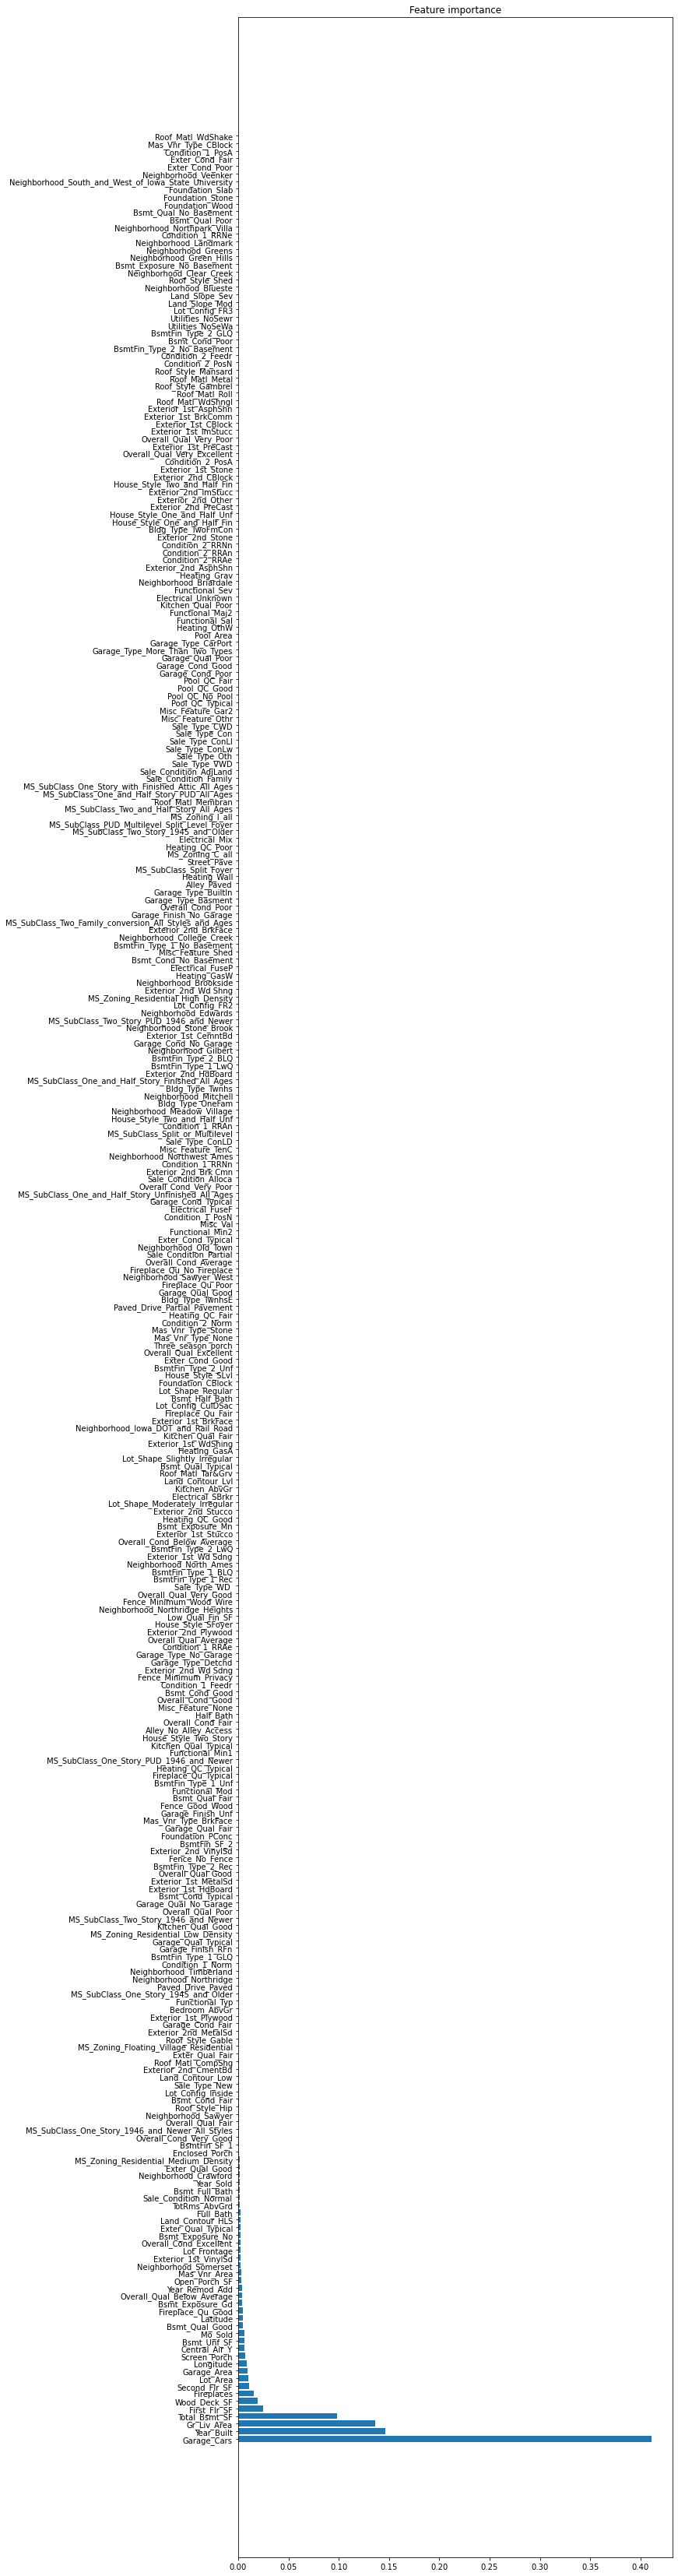

In [45]:
plt.figure(figsize=(10, 60))
plot_importance(model1, attributes_mat.columns)

## Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies

- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grilla con GridSearchCV utilizando los siguientes hiper parámetros:
    - Máximo de atributos: Evalúe todos los posibles atributos.
    - Máximo de profundidad: Entre 1 a 32.
    - Validaciones cruzadas: 5.
- Reporte la mejor combinación de hiper parámetros y su desempeño asociado.
- Compare el desempeño en la muestra de validación con el modelo por defecto.

In [46]:
hold_importance = model1.feature_importances_
sort_importance = np.argsort(hold_importance)[::-1]
names = [attributes_mat.columns[i] for i in sort_importance]

In [47]:
top_10_attr = list(pd.DataFrame({'name': names, 'score': hold_importance[sort_importance]})[:10]['name'])

In [48]:
top_10_attr

['Garage_Cars',
 'Year_Built',
 'Gr_Liv_Area',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Wood_Deck_SF',
 'Fireplaces',
 'Second_Flr_SF',
 'Lot_Area',
 'Garage_Area']

In [49]:
top_10_df = df[df.columns[df.columns.isin(top_10_attr)]]

In [50]:
top_10_df.head()

,Lot_Area,Year_Built,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF
0,31770,1960,1080,1656,0,1656,2,2,528,210
1,11622,1961,882,896,0,896,0,1,730,140
2,14267,1958,1329,1329,0,1329,0,1,312,393
3,11160,1968,2110,2110,0,2110,2,2,522,0
4,13830,1997,928,928,701,1629,1,2,482,212


In [51]:
X_train, X_test, y_train, y_test = train_test_split(top_10_df, target_vector, test_size=.33, random_state=11238)

In [52]:
get_model_params = GridSearchCV(DecisionTreeRegressor(),
                                {'max_features': list(range(1,X_train.shape[1])),
                                 'max_depth': np.linspace(1, 32,num=32, endpoint=True).astype(int)},
                                cv=10,
                                n_jobs=-1).fit(X_train, y_train)

In [53]:
get_model_params.best_params_

{'max_depth': 7, 'max_features': 4}

In [54]:
get_model_params.best_score_

0.7732853919910483

In [55]:
report_cont_metrics(get_model_params.best_estimator_, X_test=X_test)

1430100140.1309152
16662.549180327856
0.748376052981181


In [56]:
pickle.dump(get_model_params.best_estimator_, open('pickles/model_.sav', 'wb'))
pickle.dump(X_train, open('pickles/X_train.sav', 'wb'))
pickle.dump(X_test, open('pickles/X_test.sav', 'wb'))
pickle.dump(y_train, open('pickles/y_train.sav', 'wb'))
pickle.dump(y_test, open('pickles/y_test.sav', 'wb'))

In [57]:
#model_load = pickle.load(open('modelo_save.sav','rb'))
#model_load.predict(nuevos_datos)